<a href="https://colab.research.google.com/github/DorianGerardin/Cartoon-Images/blob/main/cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
# required if you use Google Colab
from google.colab.patches import cv2_imshow
from google.colab import files

In [2]:
def read_file(filename):
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

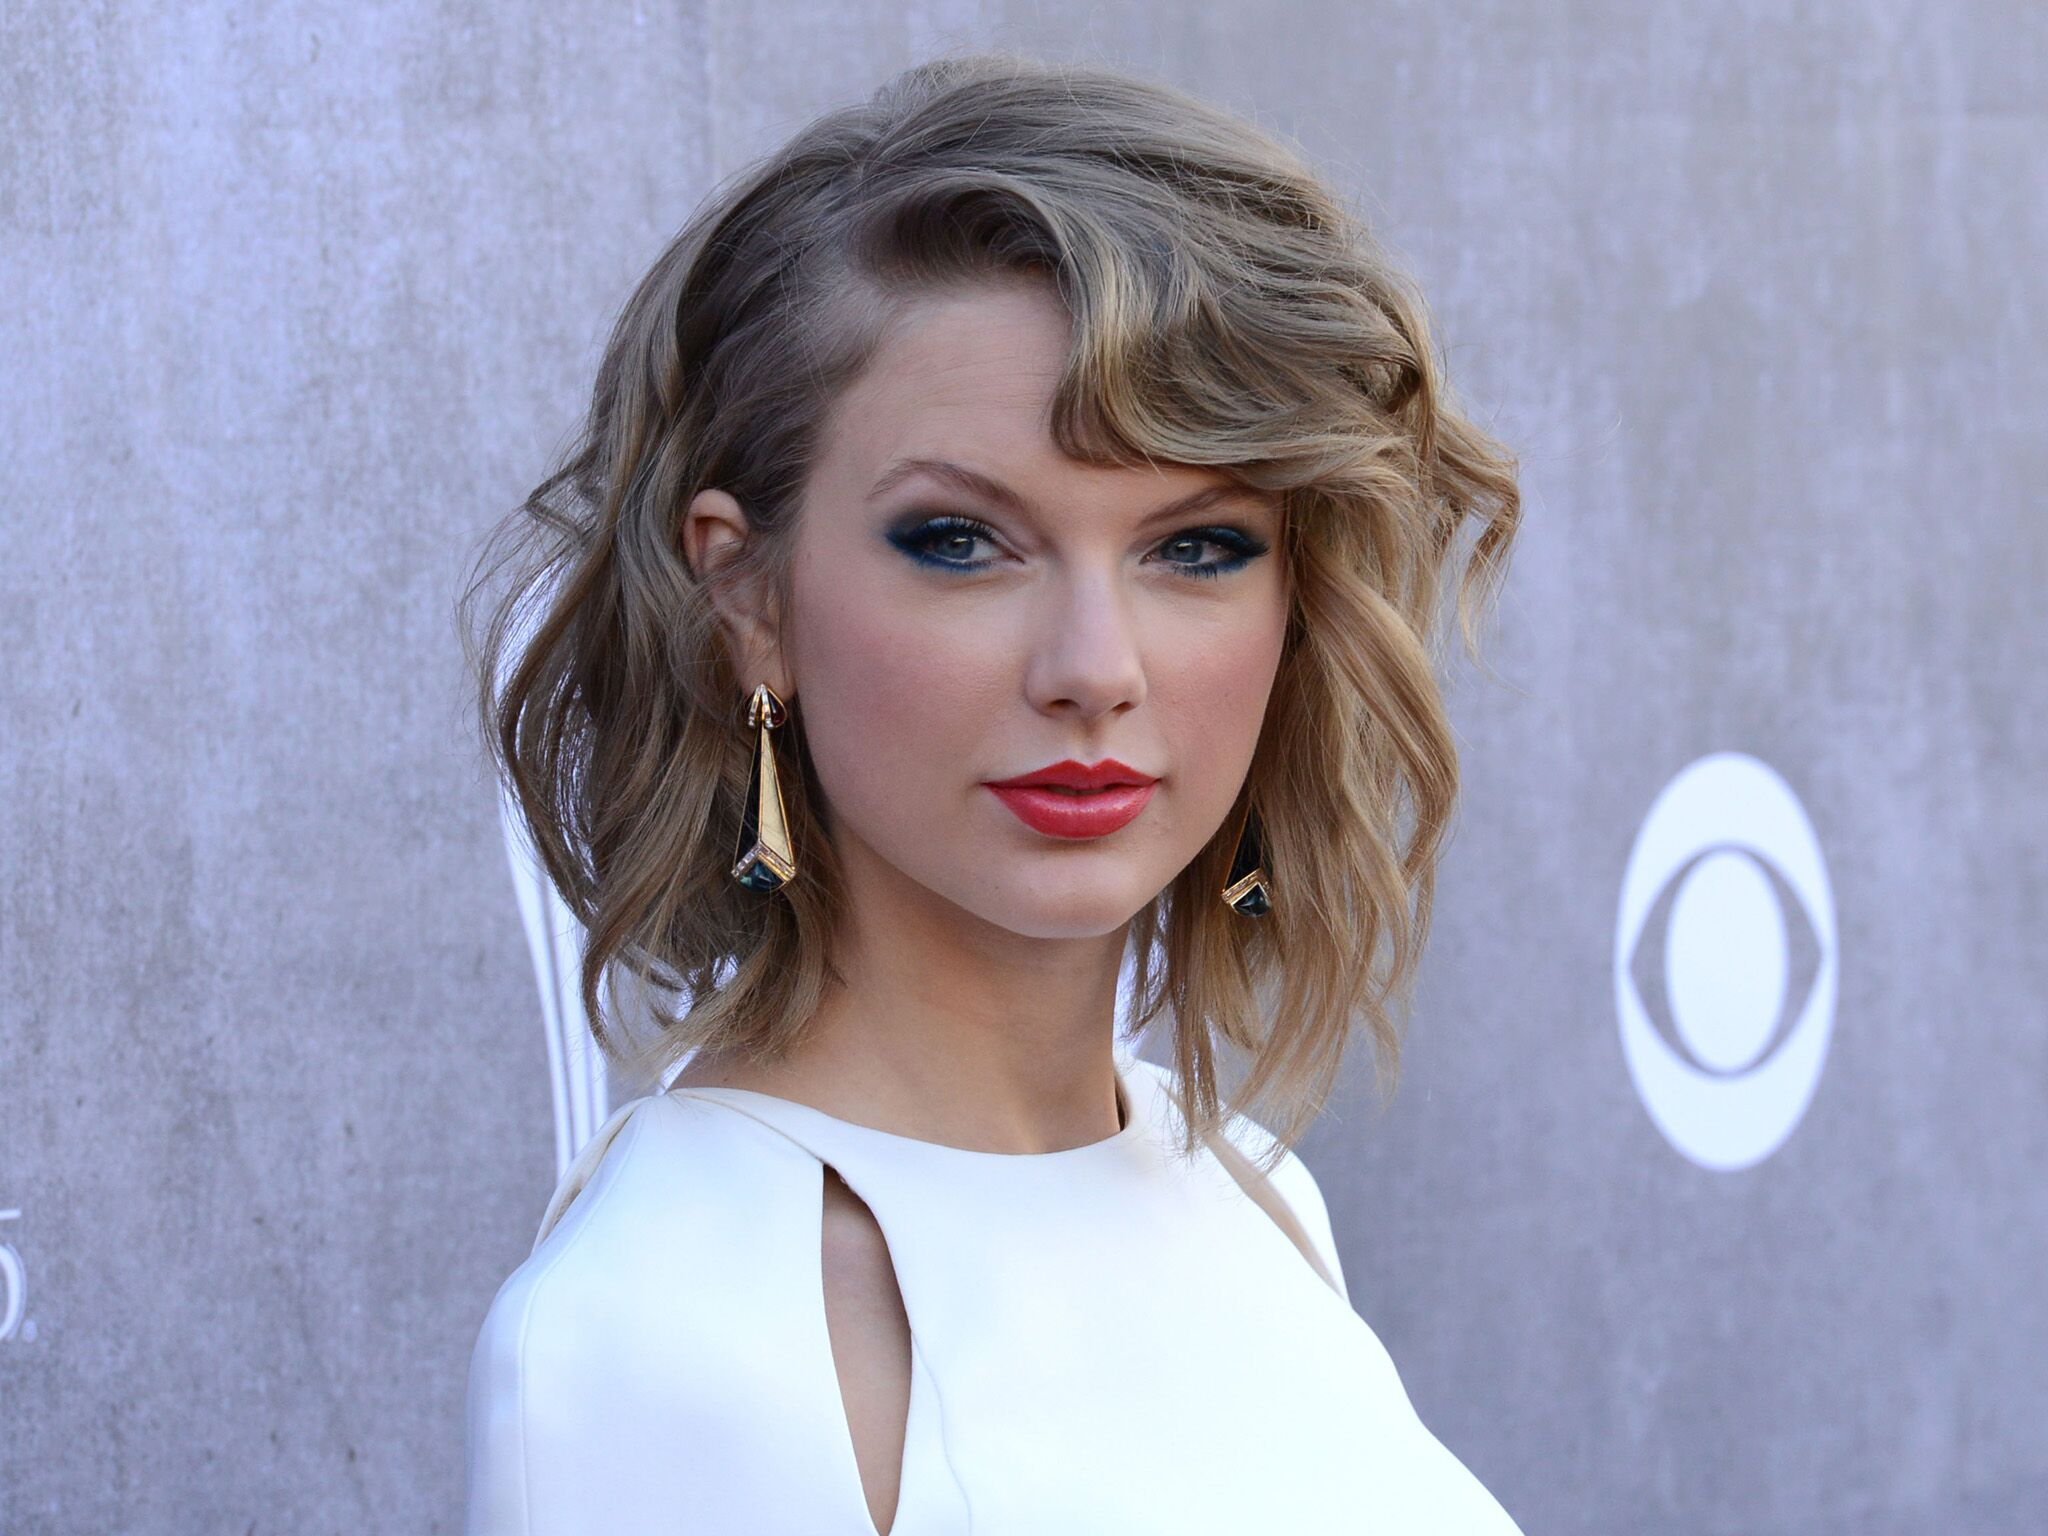

In [15]:
img = read_file("taylor-swift.jpeg")

In [16]:

def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.bilateralFilter(gray, d=7, sigmaColor=200,sigmaSpace=200)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

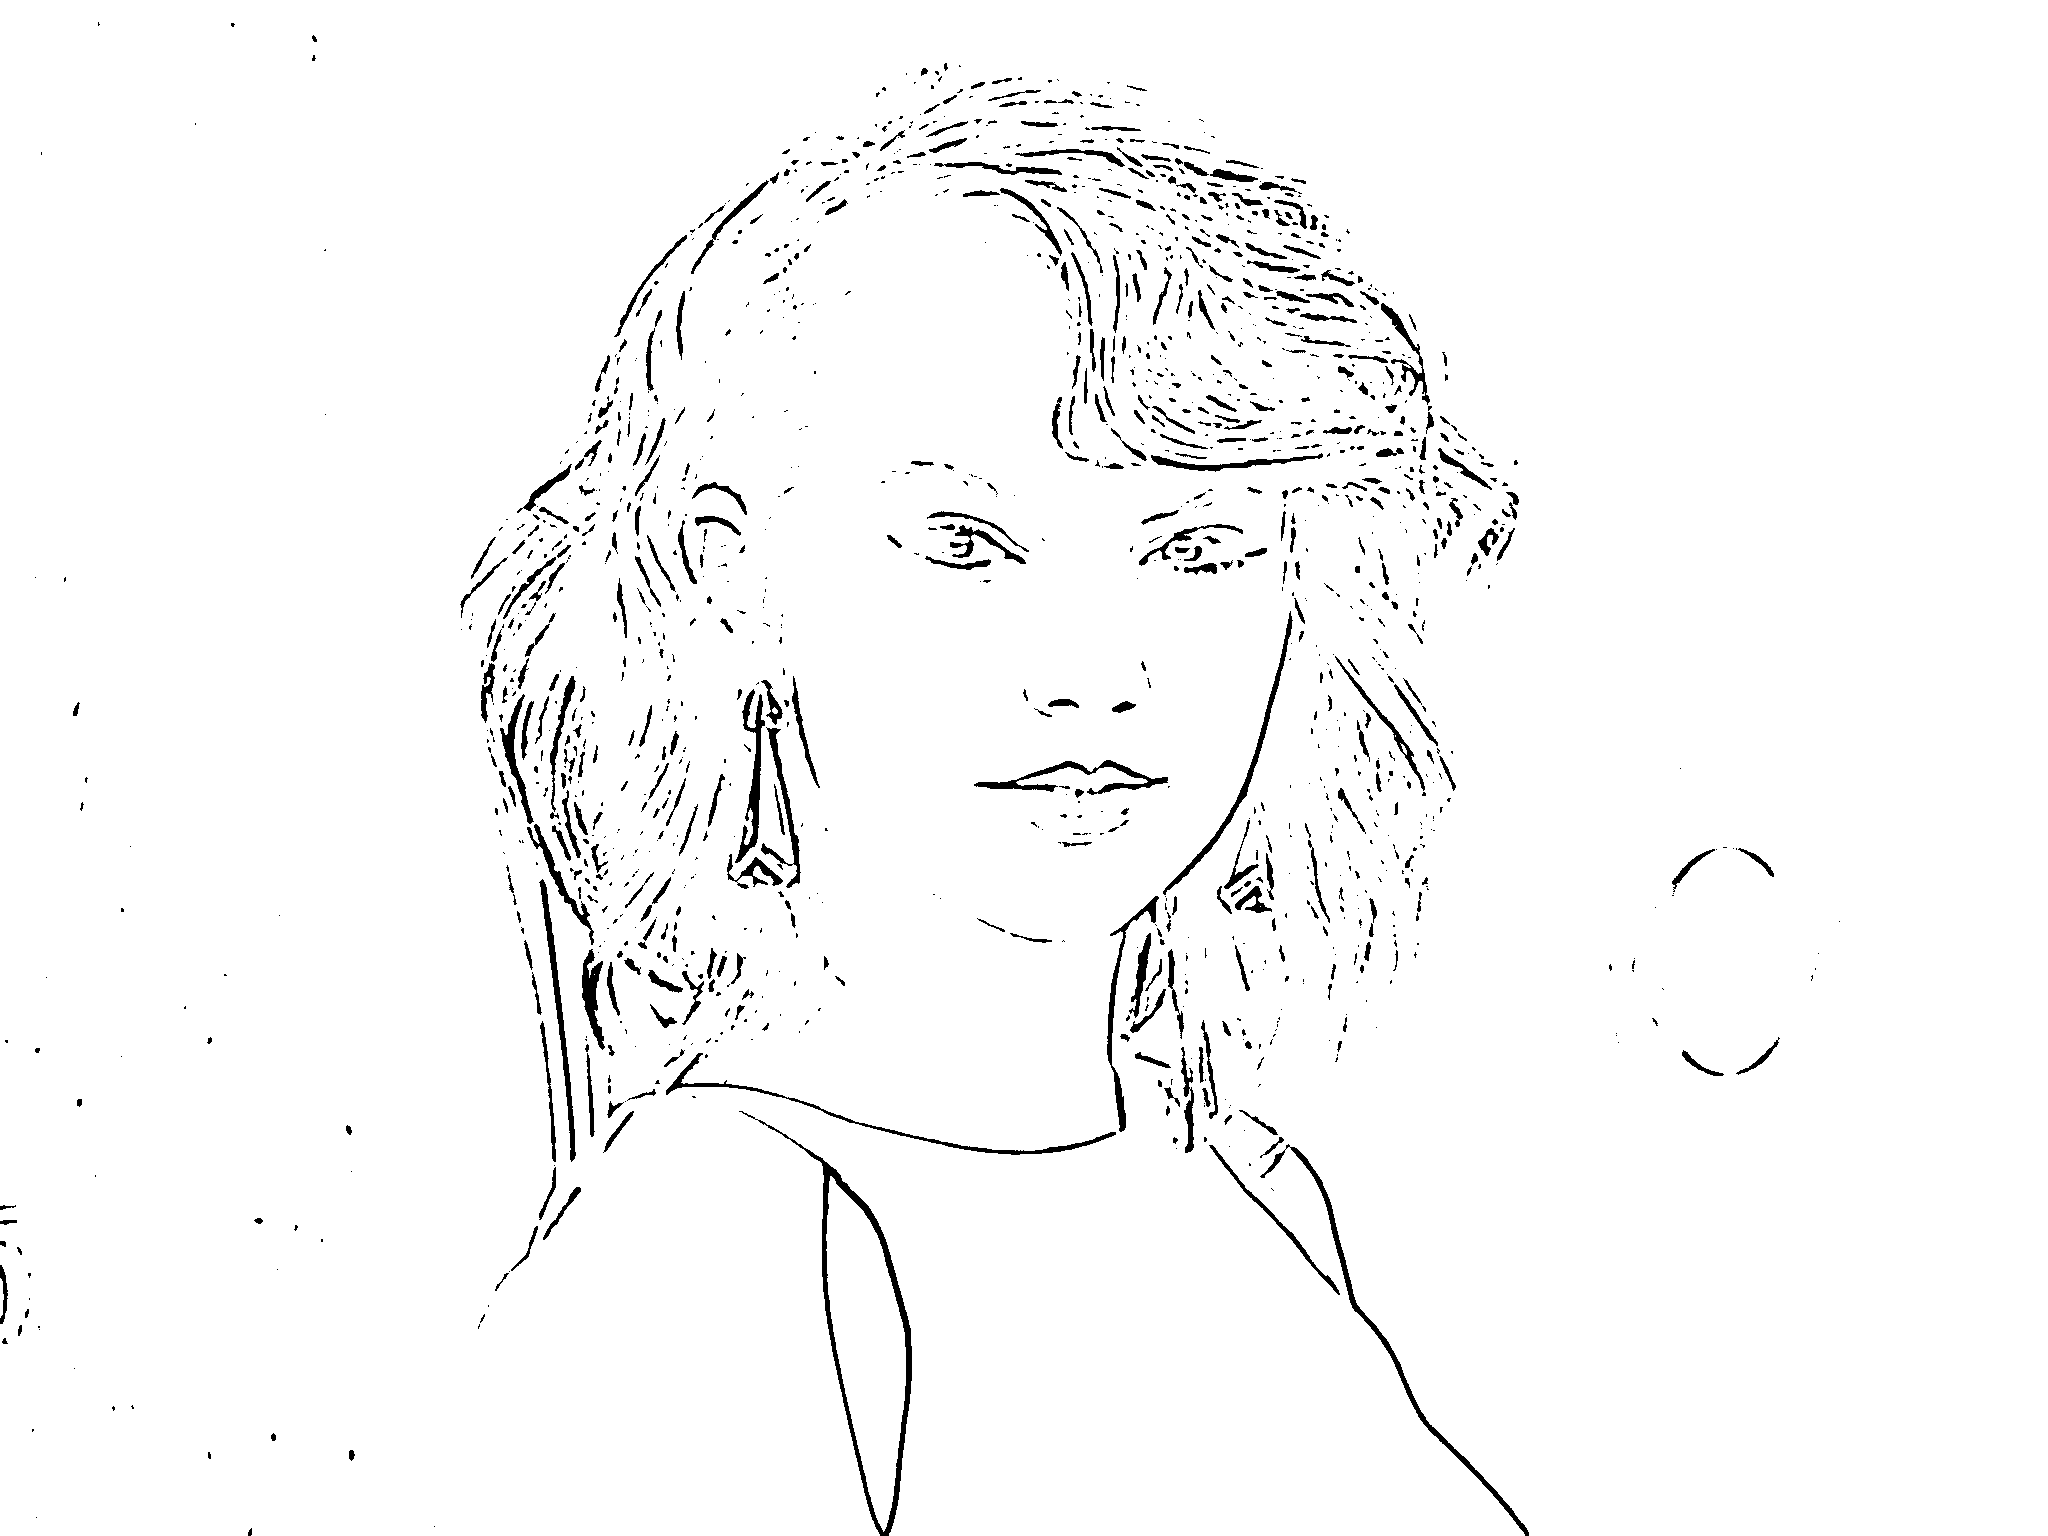

In [17]:
line_size = 13
blur_value = 9
edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

In [18]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [19]:
total_color = 17
img = color_quantization(img, total_color)

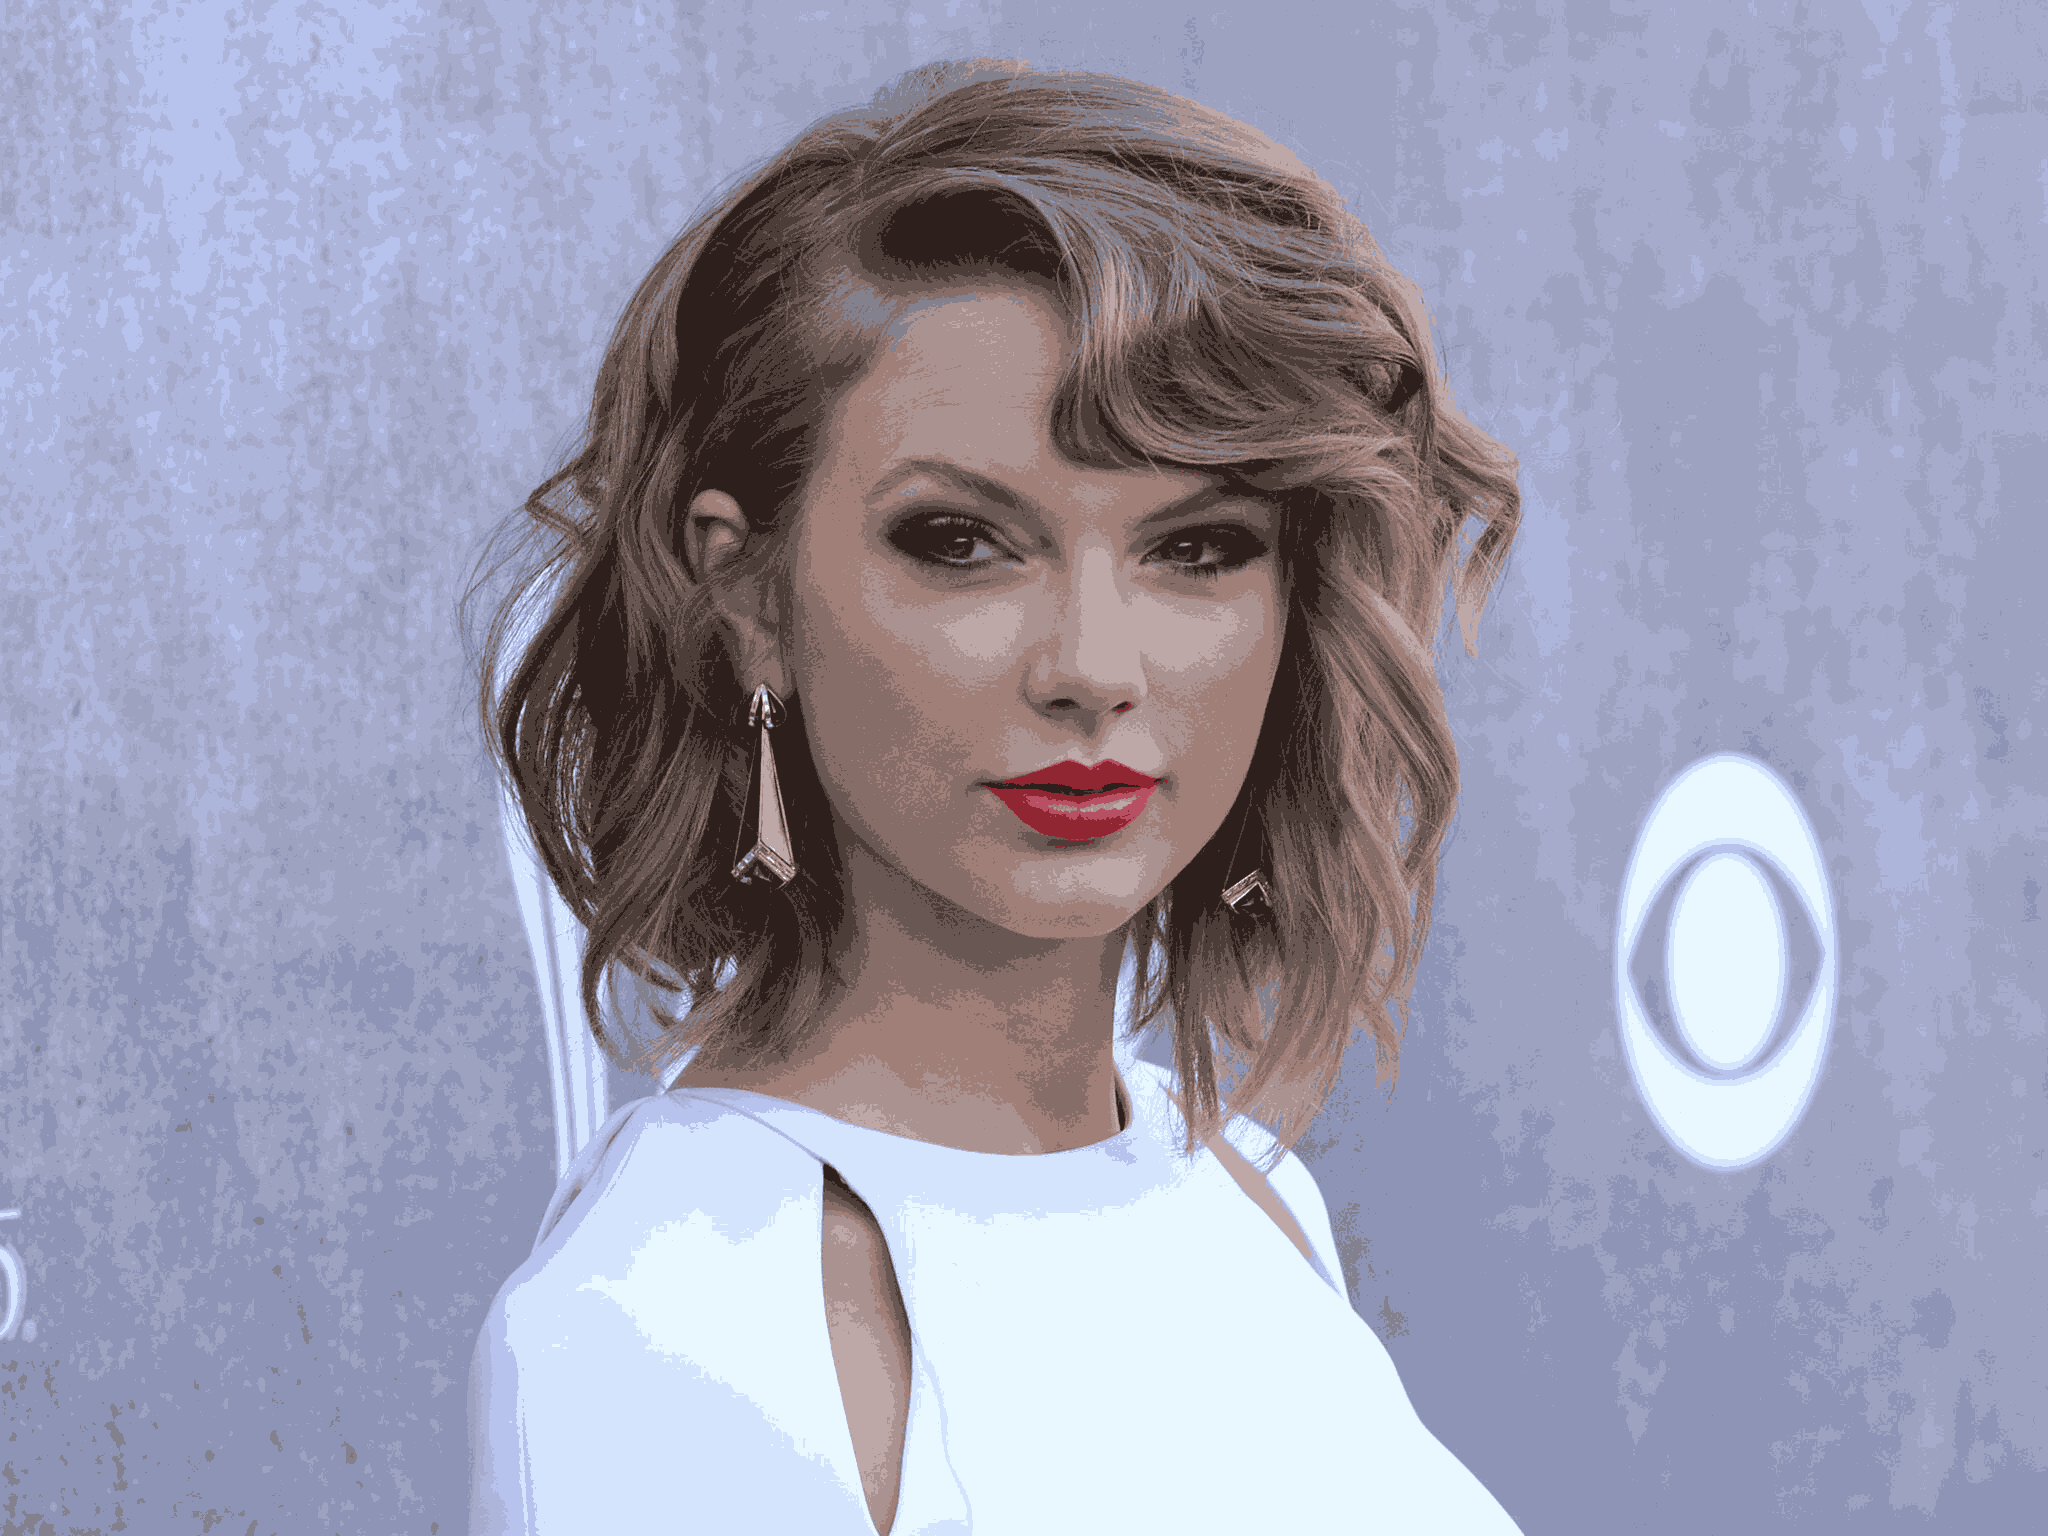

In [20]:
cv2_imshow(img)

In [21]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)

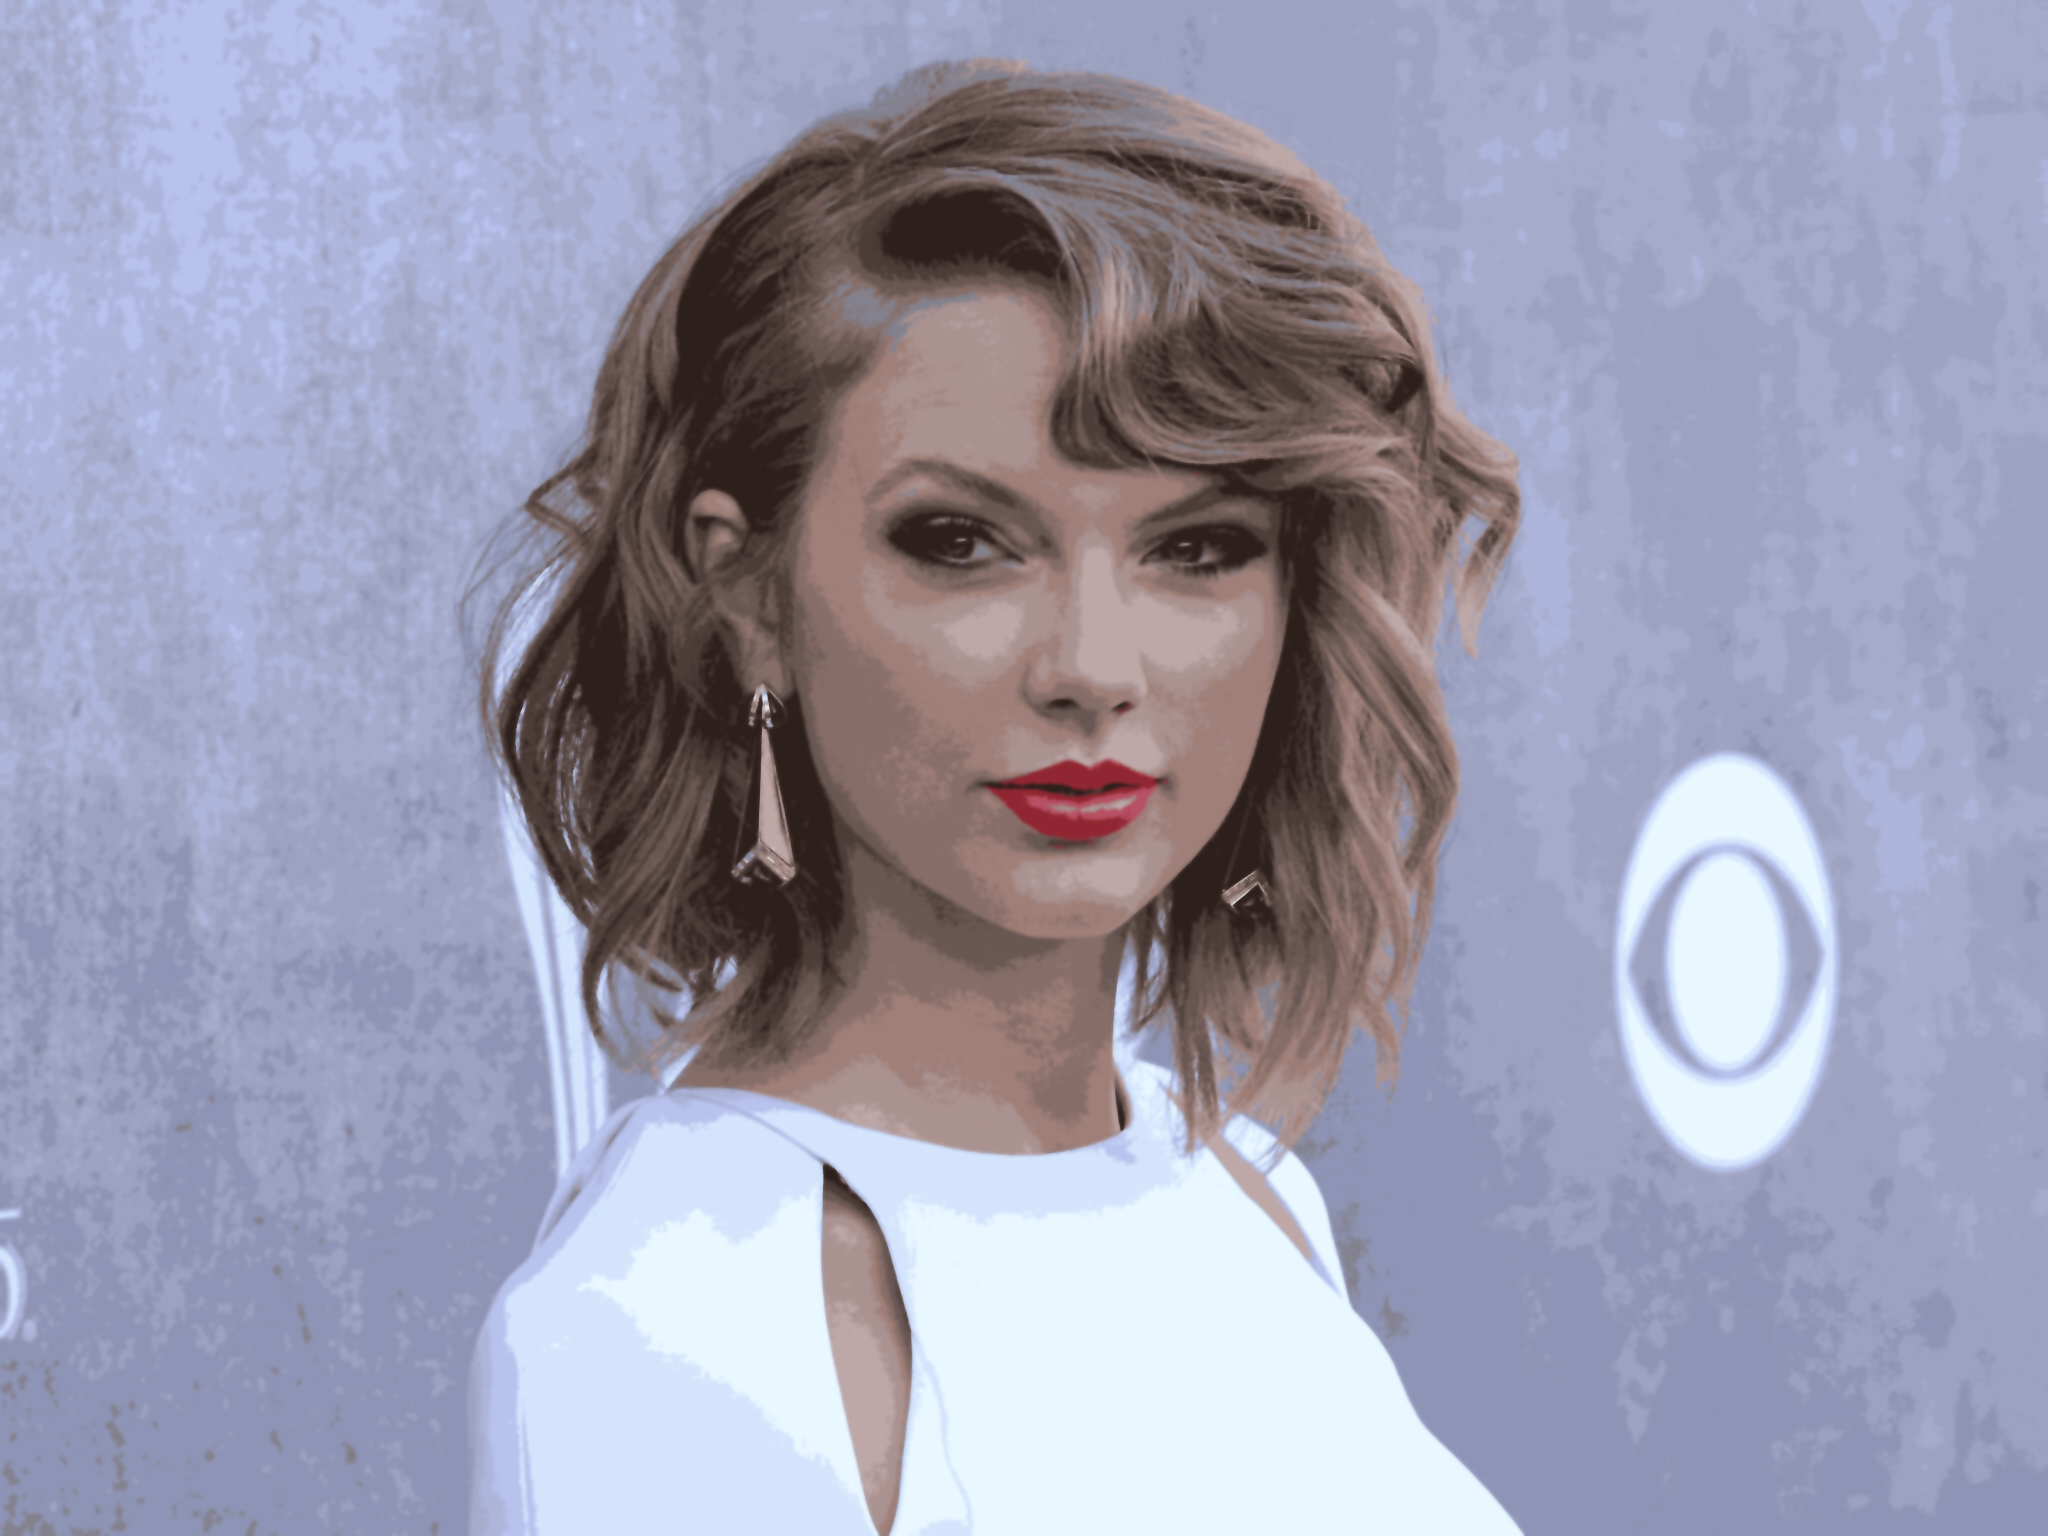

In [22]:
cv2_imshow(blurred)

In [23]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

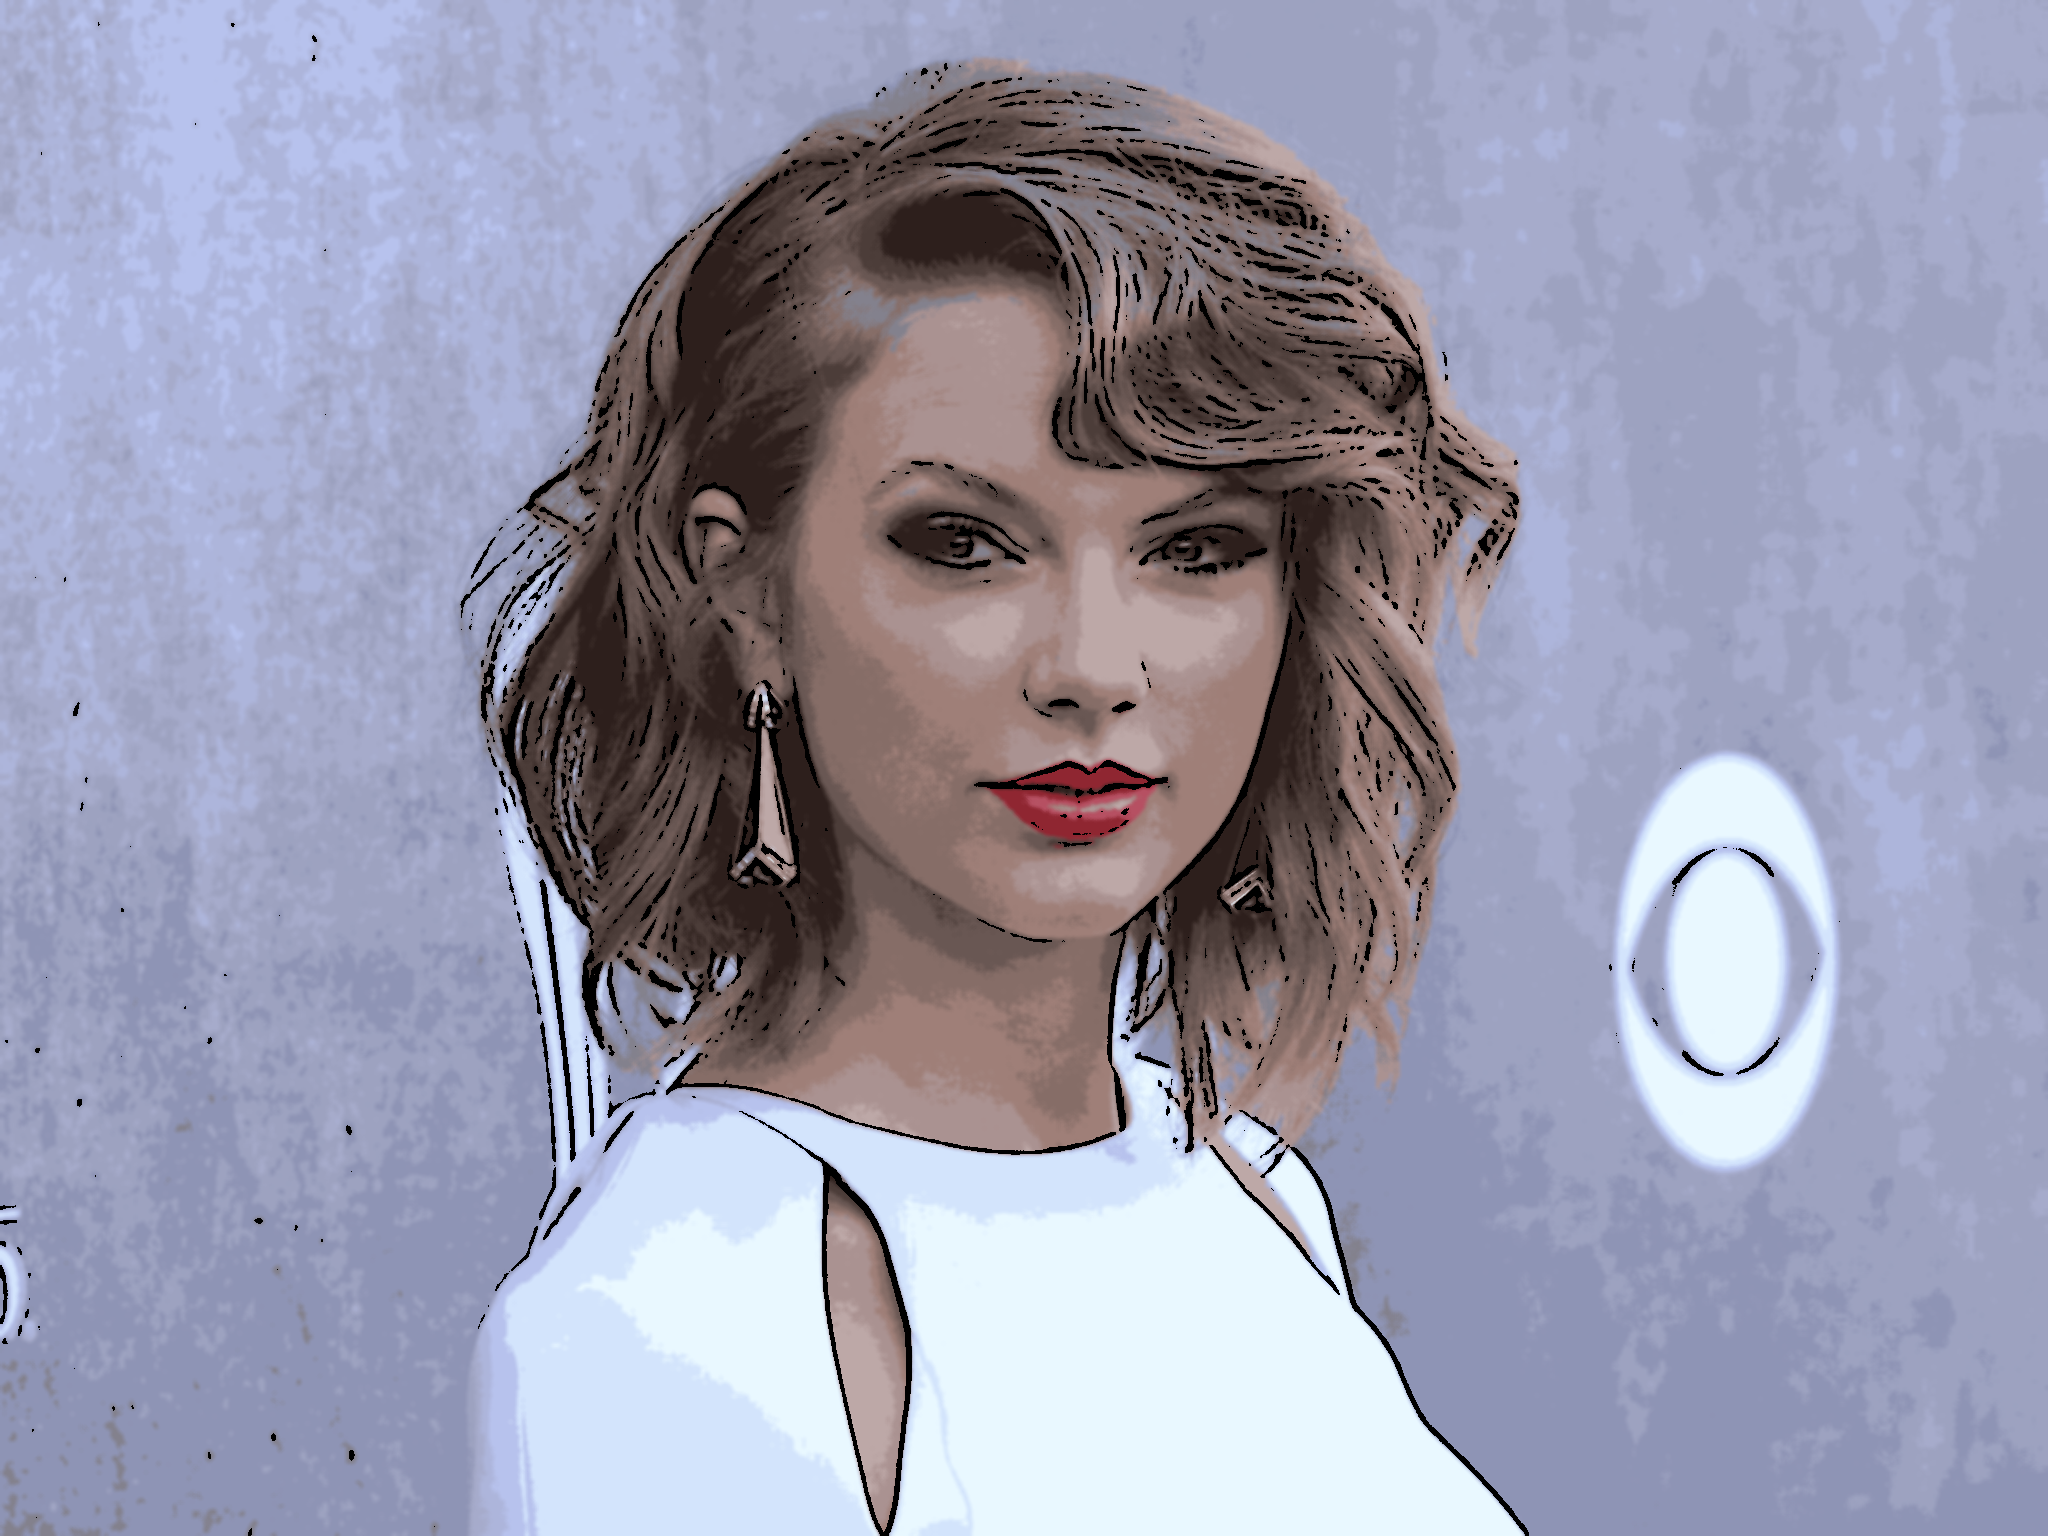

In [24]:
cv2_imshow(cartoon)

In [117]:
!pip install cartooner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


centroids: [array([  9.,  98., 110.]), array([ 61., 137., 212.]), array([ 29., 104., 167., 221.])]


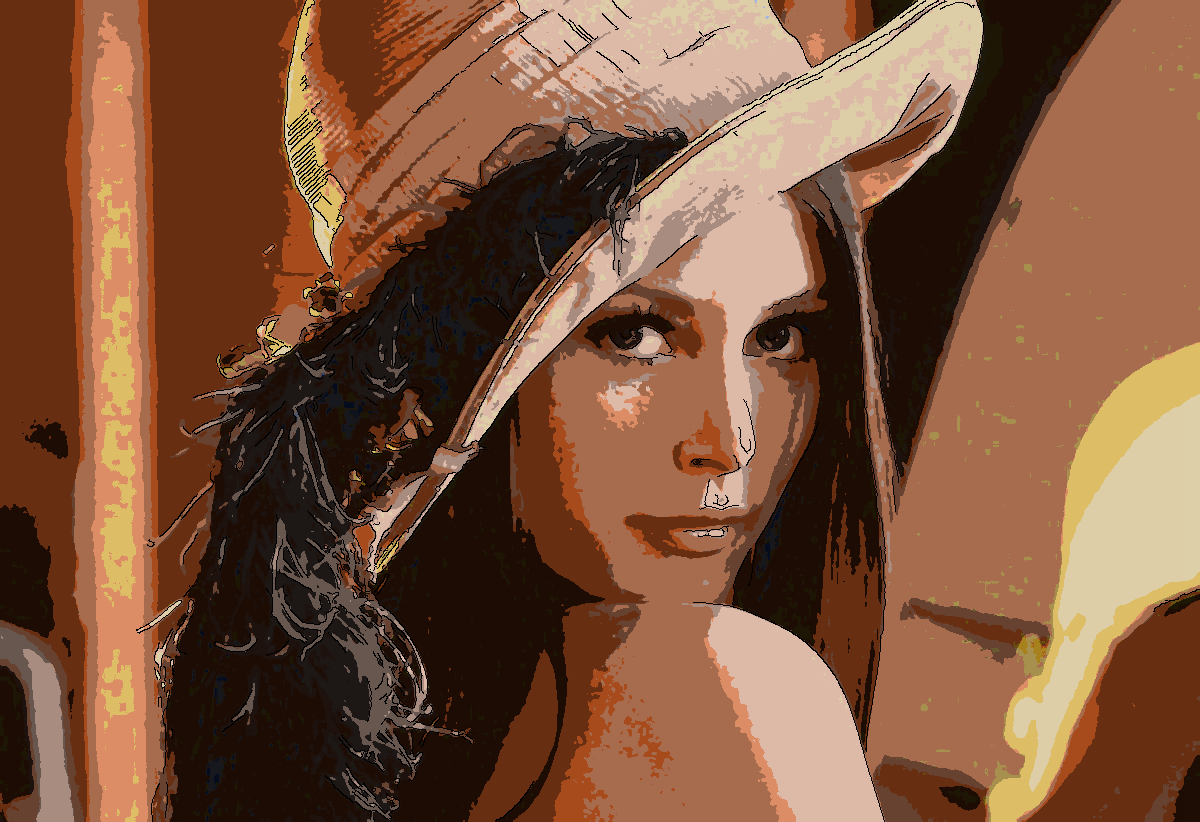

In [121]:
import cv2
import os
import time
from cartooner import cartoonize

input_file = "lena.jpg"
output_file = "output.jpg"
image = cv2.imread(input_file)
output = cartoonize(image)

cv2.imwrite(output_file, output)
cv2_imshow(output)